In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', split='train', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.79G212_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
total_examples = info.splits['train'].num_examples
train_size = int(0.8 * total_examples)  # 80% train
val_size = total_examples - train_size  # 20% validation

In [ ]:
print(val_size)

4653


In [ ]:
print(train_size)

18609


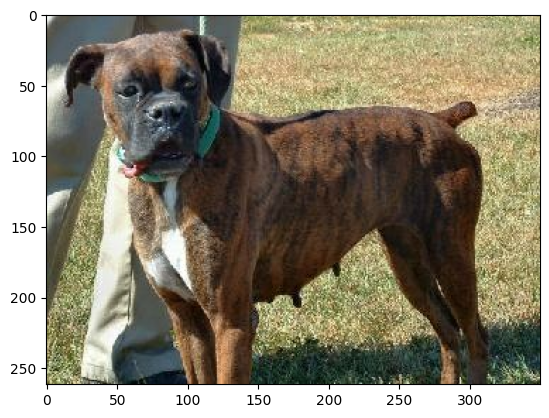

In [ ]:
for image,_ in dataset.take(1):
  plt.imshow(image)
  plt.show()

In [ ]:
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))
    image = image / 255.0  # Normalize to [0,1]
    return image, label

In [ ]:
dataset = dataset.shuffle(1000, reshuffle_each_iteration=False)

train_data = dataset.take(train_size).map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
val_data = dataset.skip(train_size).map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 7. Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.5834 - loss: 0.6737 - val_accuracy: 0.7326 - val_loss: 0.5290
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 93s 109ms/step - accuracy: 0.7512 - loss: 0.5109 - val_accuracy: 0.7823 - val_loss: 0.4635
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 62s 74ms/step - accuracy: 0.8020 - loss: 0.4300 - val_accuracy: 0.7999 - val_loss: 0.4360
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.8395 - loss: 0.3632 - val_accuracy: 0.8055 - val_loss: 0.4258
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - accuracy: 0.8780 - loss: 0.2895 - val_accuracy: 0.7971 - val_loss: 0.4721
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.9084 - loss: 0.2223 - val_accuracy: 0.8018 - val_loss: 0.5222
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.9364 - loss: 0.1654 - val_accuracy: 0.7808 - val_loss: 0.7144
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.9541 - loss: 0.1243 -

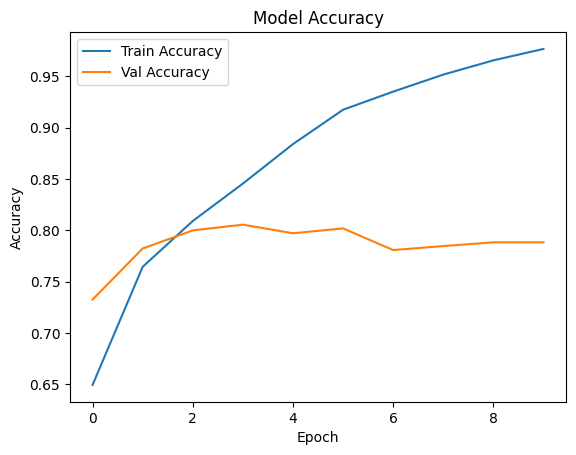

In [ ]:
# 9. Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [ ]:
# Assuming you already have `val_data` prepared
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc:.4f}")


146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.7911 - loss: 1.0129
Validation Accuracy: 0.7883


In [ ]:
# Save the trained model
model.save("cats_dogs_model.h5")


In [ ]:
# Load it again later
model = tf.keras.models.load_model("cats_dogs_model.h5")

# Then evaluate accuracy
loss, acc = model.evaluate(val_data)
print(f"Restored Model Accuracy: {acc:.4f}")


146/146 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7911 - loss: 1.0129
Restored Model Accuracy: 0.7883


In [1]:
!git config --global user.email "saminenivinay999@gmail.com"
!git config --global user.name "Vinay Samineni"


In [2]:
!git clone https://github.com/vinay-samineni/CNN_Binary_classification.git


Cloning into 'CNN_Binary_classification'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [4]:
!cp /content/CNN1.ipynb /content/CNN_Binary_classification/


cp: cannot stat '/content/CNN1.ipynb': No such file or directory


In [5]:
!ls /content

CNN_Binary_classification  sample_data


In [6]:
!ls /content


CNN_Binary_classification  sample_data


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
